# Практическая работа №4. Сравнение FoldX и RFDesign для стабилизации структуры

# RFdesign

In [ ]:
import sys
sys.path.append('/home/domain/data/prog/miniconda3/envs/trdesign')
from utils  import *
from models import *
from to_pdb import *


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pwd

/home/student/kondratyuk


In [ ]:
pdb = prep_input("1L2Y.pdb", chain="A")
feat = pdb["feat"]
seq = np.eye(20)[AA_to_N(pdb["seq"])]

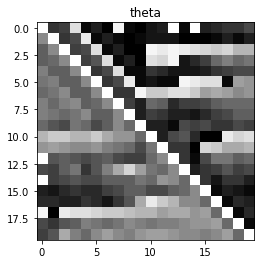

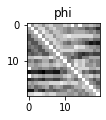

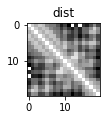

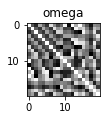

In [ ]:
plt.figure(figsize=(20,4) )

for n,(k,v) in enumerate(split_feat(feat).items()):
  plt.subplot(1,4,n+1); plt.title(k)
  plt.imshow(np.squeeze(v).argmax(-1),cmap="binary")
  plt.show()


In [ ]:
! ln -s /home/domain/data/prog/miniconda3/envs/trdesign/models/

In [ ]:
model = mk_design_model(add_pdb=True, n_models=5, msa_design=True, feat_drop=0.8)

mode: msa design
loading model: xaa
loading model: xab
loading model: xac
loading model: xad
loading model: xae
The loss function is composed of the following: ['pdb']


In [ ]:
  design = model.design(inputs={"pdb":feat[None]}, return_traj=True,  num=1000)

/home/domain/data/prog/miniconda3/envs/SE3-nvidia/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10 loss:{'pdb':2.5307245}
20 loss:{'pdb':2.477065}
30 loss:{'pdb':2.3766215}
40 loss:{'pdb':2.3128347}
50 loss:{'pdb':2.2552586}
60 loss:{'pdb':2.299225}
70 loss:{'pdb':2.2949085}
80 loss:{'pdb':2.3173912}
90 loss:{'pdb':2.2888587}
100 loss:{'pdb':2.3083124}
FINAL loss:{'pdb':2.1312597}


In [ ]:
N_to_AA(design["I"].argmax(-1))

['KLWQQMRQSNPGWCGCPPTD',
 'KEMDQMCKKGPPGCGVKPVD',
 'KEWQQMAQKGPGNCPCKPTD',
 'KEWDQMRQKGPGGCNFPPTD',
 'KEMKQWAQSNPPGCGWRCTD',
 'KEWRQMEDQGCPGFPCPCTD',
 'KEWQQMAQQGPPGNGWRPVD',
 'KEMRQCCDRGPPGFGWPCTD',
 'KEWAQMAQKCCPGCGVPCTD',
 'KEWEQMMQKNCPGCGMPCTD',
 'KEWRQLAESGPCPNGWPVTD',
 'KEWEQCCKNGPPGNGWRPTD',
 'KEWEQMCKLGPCGNGTEPTD',
 'KEWRQMAESGPDGCNCKATD',
 'KEMAQMAQSNPCPCGCPVTD',
 'KECKQMCQQGPPGCNCKCTD',
 'KLCRQCANSGPPGCGVPCTD',
 'KEMDQCAQQGPPGNGWPCTD',
 'SECKEMAQSGPPGCGVPPTD',
 'KEWQQMAQSNPGGCNVKATD',
 'KEWEQCCDRGPGGFGWPPTD',
 'KEWRQMRDRGPPGNGWRPTD',
 'KEMRQMAQSGCPGCGMPCVD',
 'KVWRRMAESGPPGCGCPPTD',
 'KEWKQWIDTGPCGNGWPVTD',
 'KLWRQWADTGPGGNGWPVTD',
 'KEMQQMQQRGPGGNGWKPVD',
 'KEWEQMARSCCPGCGVPCTD',
 'KIVRQWAQSCPCGCGWPPTD',
 'KEMRQMAETGPPGCNCPCTD',
 'KEMQQMAQQGCPGCGMPCVD',
 'KEWRQWAQSNPCDCGIPPTD',
 'KVWRQLERQGPPGNGWPVTD',
 'KLWKQMEQQGPRDCGVPCTD',
 'KEWKQMAQTGPCHFPCKPTD',
 'KEWQQLAQECPGWCGVPPTD',
 'KEWQQMAQKGPDGCNFKPTD',
 'KEWEQMCRSGCPNNGVPCTD',
 'KEWDQWAKTGCCGCGWPCTD',
 'KEWEQMAKTGCPGNGVKCTD',


In [ ]:
seqs = N_to_AA(design["I"].argmax(-1))
with open("designed_sequences.txt", "w") as f:
    for s in seqs:
        f.write(s + "\n")

In [ ]:
with open('/content/designed_sequences.txt') as f:
  loaded_seqs = [line.strip() for line in f]

In [ ]:
!pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 78.0 MB/s eta 0:00:00


In [ ]:
import logomaker as lm

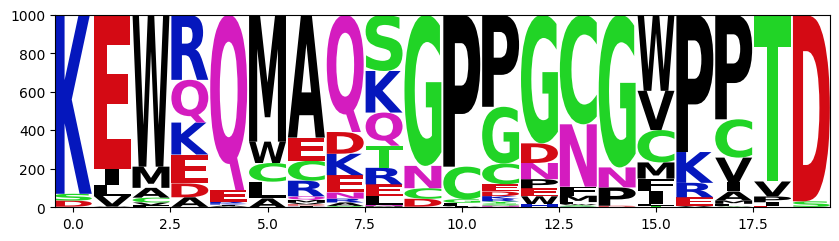

In [ ]:
counts_mat = lm.alignment_to_matrix(loaded_seqs)
counts_mat.head()
lm.Logo(counts_mat)

In [ ]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment

/usr/local/lib/python3.12/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
_1L2Y_mut = Seq("NLYIQWLKDGGPSSGRPPPS")
RFDesign_seq = Seq("KEWRQMAQSGPPGCGWPPTD")
pdb_2JOF = Seq("DAYAQWLKDGGPSSGRPPPS")

In [ ]:
alignments = pairwise2.align.globalxx(pdb_2JOF, _1L2Y_mut)
bal1 = alignments[0]

alignments = pairwise2.align.globalxx(pdb_2JOF, RFDesign_seq)
bal2 = alignments[0]

In [ ]:
print("Выравнивание pdb_2JOF на 1L2Y_mut:")
print(format_alignment(*bal1))
print("\nВыравнивание pdb_2JOF на RFDesign_seq:")
print(format_alignment(*bal2))

Выравнивание pdb_2JOF на 1L2Y_mut:
DA--YA-QWLKDGGPSSGRPPPS
    |  ||||||||||||||||
--NLY-IQWLKDGGPSSGRPPPS
  Score=17


Выравнивание pdb_2JOF на RFDesign_seq:
DAY------AQWLKDGGPSSGRPP----PS---
         ||        || ||    |    
---KEWRQMAQ--------SG-PPGCGWP-PTD
  Score=7



Видим, что скор для выравнивания нашего мутанта на 2JOF (эталонный вариант) больше, значит он справился лучше